## Well

Some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
welly.__version__

'0.3.3'

In [2]:
import os
env = %env

## Load a well from LAS

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [3]:
from welly import Well

In [4]:
w = Well.from_las('P-129_out.LAS')

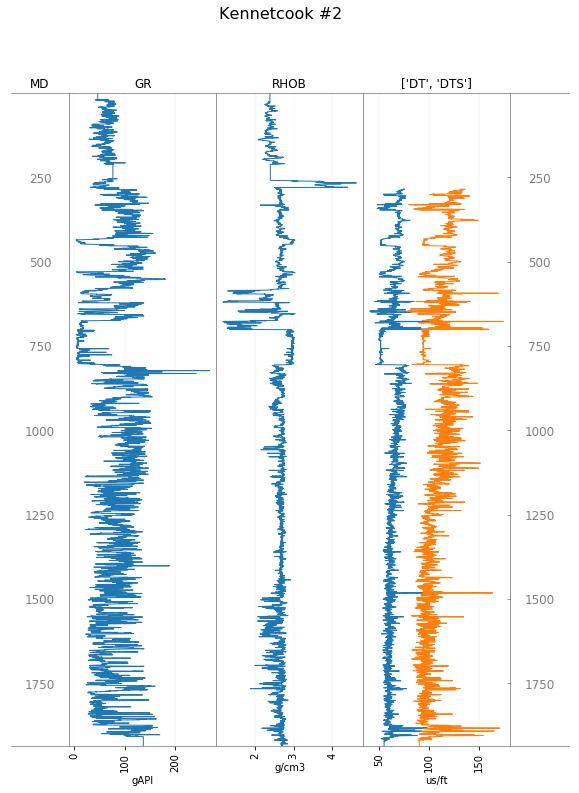

In [5]:
tracks = ['MD', 'GR', 'RHOB', ['DT', 'DTS'], 'MD']
w.plot(tracks=tracks)

## Add a striplog

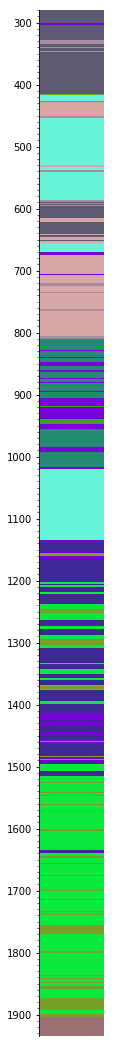

In [6]:
from striplog import Legend, Striplog
legend = Legend.builtin('NSDOE')
strip = Striplog.from_image('P-129_280_1935.png', 280, 1935, legend=legend)
strip.plot()

In [7]:
w.data['strip'] = strip

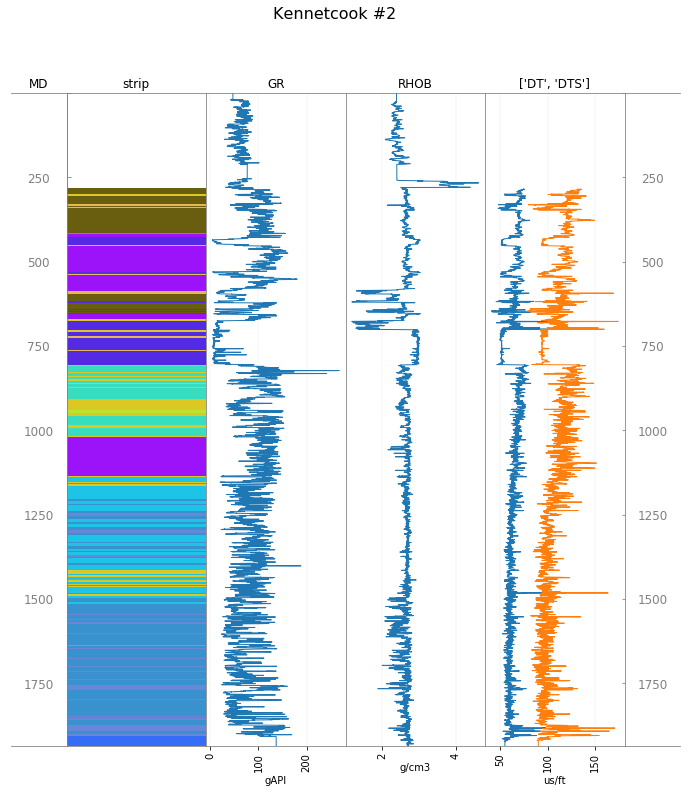

In [8]:
tracks = ['MD', 'strip', 'GR', 'RHOB', ['DT', 'DTS'], 'MD']
w.plot(tracks=tracks)

## Header

Maybe should be called 'meta' as it's not really a header... 

In [9]:
w.header

{'name': 'Kennetcook #2', 'field': 'Windsor Block', 'license': 'P-129', 'uwi': "Long = 63* 45'24.460  W", 'company': 'Elmworth Energy Corporation'}

In [10]:
w.header.name

'Kennetcook #2'

In [11]:
w.uwi  # Fails because not present in this file. See one way to add it in a minute.

"Long = 63* 45'24.460  W"

## Location and CRS

In [12]:
w.location

Location({'td': 1935.0, 'crs': CRS({}), 'location': 'Lat = 45* 12\' 34.237" N', 'country': 'CA', 'province': 'Nova Scotia', 'section': '45.20 Deg N', 'range': 'PD 176', 'township': '63.75 Deg W', 'kb': 94.8, 'gl': 90.3, 'tdd': 1935.0, 'tdl': 1935.0, 'deviation': None, 'position': None})

In [13]:
from welly import CRS
w.location.crs = CRS.from_epsg(2038)

In [14]:
w.location.crs

CRS({'init': 'epsg:2038', 'no_defs': True})

Right now there's no position log — we need to load a deviation survey.

In [15]:
w.location.position

## Add deviation data to a well

In [16]:
p = Well.from_las('P-130_out.LAS')

In [17]:
dev = np.loadtxt('P-130_deviation_survey.csv', delimiter=',', skiprows=1)

The columns are MD, inclination, azimuth, and TVD.

In [18]:
dev[:5]

array([[  18. ,    0.3,    0. ,   18. ],
       [  38. ,    0.5,    0. ,   38. ],
       [  57. ,    1.5,    0. ,   57. ],
       [  84. ,    1.8,    0. ,   84. ],
       [ 104. ,    0.5,    0. ,  104. ]])

`add_deviation` assumes those are the columns, and computes a position log.

In [19]:
p.location.add_deviation(dev[:, :3], td=2618.3)

The columns in the position log are _x_ offset, _y_ offset, and TVD.

In [20]:
p.location.position[:5]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.71237821e-02,   0.00000000e+00,   1.79999178e+01],
       [  1.86748917e-01,   0.00000000e+00,   3.79994202e+01],
       [  5.18340431e-01,   0.00000000e+00,   5.69962853e+01],
       [  1.29577626e+00,   0.00000000e+00,   8.39850594e+01]])